In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
# import squarify

In [2]:
#Read RFM Data
df = pd.read_csv("RFM_3yr")

In [3]:
df.head()

,CID,TRIPS,SALES,DAYS
0,11,49,2887.71,57
1,16,28,718.25,396
2,19,5,473.18,145
3,24,31,1207.11,67
4,30,1,39.00,872


In [5]:
quintiles = df[['DAYS', 'TRIPS', 'SALES']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'DAYS': {0.2: 136.0, 0.4: 254.0, 0.6: 500.0, 0.8: 774.0},
 'TRIPS': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 6.0},
 'SALES': {0.2: 40.76, 0.4: 88.18, 0.6: 178.87, 0.8: 434.45}}

In [6]:
def r_score(x):
    if x <= quintiles['DAYS'][.2]:
        return 5
    elif x <= quintiles['DAYS'][.4]:
        return 4
    elif x <= quintiles['DAYS'][.6]:
        return 3
    elif x <= quintiles['DAYS'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [7]:
df['R'] = df['DAYS'].apply(lambda x: r_score(x))
df['F'] = df['TRIPS'].apply(lambda x: fm_score(x, 'TRIPS'))
df['M'] = df['SALES'].apply(lambda x: fm_score(x, 'SALES'))

In [8]:
df['RFM Score'] = df['R'].map(str) + df['F'].map(str) + df['M'].map(str)
df.head()

,CID,TRIPS,SALES,DAYS,R,F,M,RFM Score
0,11,49,2887.71,57,5,5,5,555
1,16,28,718.25,396,3,5,5,355
2,19,5,473.18,145,4,4,5,445
3,24,31,1207.11,67,5,5,5,555
4,30,1,39.00,872,1,1,1,111


In [9]:
df.sort_values(by=['RFM Score', 'SALES'], ascending=[True, False])
df.head()

,CID,TRIPS,SALES,DAYS,R,F,M,RFM Score
0,11,49,2887.71,57,5,5,5,555
1,16,28,718.25,396,3,5,5,355
2,19,5,473.18,145,4,4,5,445
3,24,31,1207.11,67,5,5,5,555
4,30,1,39.00,872,1,1,1,111


In [10]:
df.groupby('RFM Score').agg('SALES').mean()

RFM Score
111      22.772454
112      60.313612
113     120.514359
114     247.209815
115     811.576287
121      28.917270
122      64.536638
123     126.036925
124     253.205568
125     766.055715
131      28.584741
132      67.925422
133     131.099095
134     264.373556
135     719.877085
141      27.455973
142      69.618954
143     136.879720
144     281.863797
145     724.645146
151      30.078478
152      68.363346
153     141.887007
154     310.578538
155     940.197761
211      23.099733
212      60.359269
213     120.272012
214     247.136025
215     831.867614
          ...     
451      31.137163
452      71.499001
453     146.512242
454     323.961804
455    1139.204862
511      23.464691
512      60.382916
513     120.124760
514     248.982897
515     848.326155
521      30.104789
522      64.973113
523     126.470420
524     252.835181
525     781.919840
531      31.690855
532      68.648433
533     131.856521
534     264.132390
535     709.188341
541      31.960928
54

In [11]:
df['Total Score'] = df['R'] + df['F'] +df['M']
print(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86817653 entries, 0 to 86817652
Data columns (total 9 columns):
CID            int64
TRIPS          int64
SALES          float64
DAYS           int64
R              int64
F              int64
M              int64
RFM Score      object
Total Score    int64
dtypes: float64(1), int64(7), object(1)
memory usage: 5.8+ GB
   CID  TRIPS    SALES  DAYS  R  F  M RFM Score  Total Score
0   11     49  2887.71    57  5  5  5       555           15
1   16     28   718.25   396  3  5  5       355           13
2   19      5   473.18   145  4  4  5       445           13
3   24     31  1207.11    67  5  5  5       555           15
4   30      1    39.00   872  1  1  1       111            3 None


In [12]:
df.groupby('Total Score').agg('SALES').mean()

Total Score
3       22.772454
4       41.357912
5       61.237564
6       81.439698
7      107.721282
8      142.977473
9      183.632965
10     235.810061
11     302.896930
12     404.025192
13     583.576974
14     914.978750
15    1603.013286
Name: SALES, dtype: float64

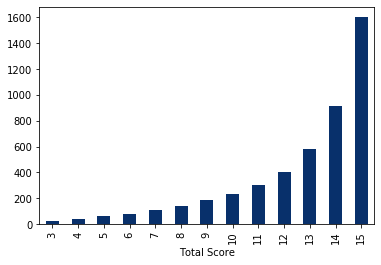

In [13]:
df.groupby('Total Score').agg('SALES').mean().plot(kind='bar', colormap='Blues_r')

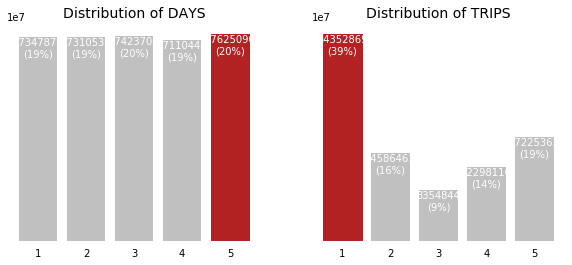

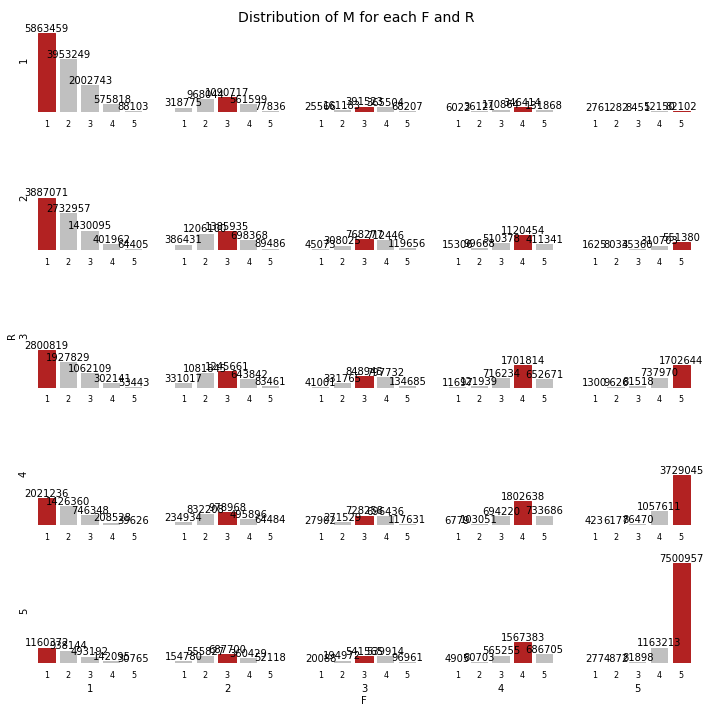

In [14]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'DAYS', 'F':'TRIPS'}
    y = df[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = df[(df['R'] == r) & (df['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

# Segment	Description
1. Champions -	Bought recently, buy often and spend the most<br>
2. Loyal Customers-	Buy on a regular basis. Responsive to promotions.<br>
3. Potential Loyalist-	Recent customers with average frequency.<br>
4. Recent Customers-	Bought most recently, but not often.<br>
5. Promising-	Recent shoppers, but haven’t spent much.<br>
6. Customers Needing Attention-	Above average recency, frequency and monetary values. May not have bought very recently though.<br>
7. About To Sleep-	Below average recency and frequency. Will lose them if not reactivated.<br>
8. At Risk	-Purchased often but a long time ago. Need to bring them back!<br>
9. Can’t Lose Them	-Used to purchase frequently but haven’t returned for a long time.<br>
10. Hibernating-	Last purchase was long back and low number of orders. May be lost.<br>

In [15]:
# segt_map = {
#     r'[1-2][1-2]': 'hibernating',
#     r'[1-2][3-4]': 'at risk',
#     r'[1-2]5': 'can\'t loose',
#     r'3[1-2]': 'about to sleep',
#     r'33': 'need attention',
#     r'[3-4][4-5]': 'loyal customers',
#     r'41': 'promising',
#     r'51': 'new customers',
#     r'[4-5][2-3]': 'potential loyalists',
#     r'5[4-5]': 'champions'
# }

# df['Segment'] = df['R'].map(str) + df['F'].map(str)
# df['Segment'] = df['Segment'].replace(segt_map, regex=True)
# df.head()

segt_map = {
    r'[1-2][1-4]': 'hibernating',
    r'[1-2]5': 'can\'t loose',
    r'3[1-3]': 'about to sleep',
    r'[3-4][4-5]': 'loyal customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'[4-5]1': 'new customers',
    r'5[4-5]': 'champions'
}

df['Segment'] = df['R'].map(str) + df['F'].map(str)
df['Segment'] = df['Segment'].replace(segt_map, regex=True)
df.head()

,CID,TRIPS,SALES,DAYS,R,F,M,RFM Score,Total Score,Segment
0,11,49,2887.71,57,5,5,5,555,15,champions
1,16,28,718.25,396,3,5,5,355,13,loyal customers
2,19,5,473.18,145,4,4,5,445,13,loyal customers
3,24,31,1207.11,67,5,5,5,555,15,champions
4,30,1,39.00,872,1,1,1,111,3,hibernating


In [16]:
# count the number of customers in each segment
# segments_counts = df['Segment'].value_counts().sort_values(ascending=True)
# print(segments_counts)

segment_count_R_F = df.groupby('Segment').agg({
    'DAYS': 'mean',
    'TRIPS': 'mean',
    'SALES': ['mean', 'count']
}).round(1)
print(segment_count_R_F)

                      DAYS TRIPS   SALES          
                      mean  mean    mean     count
Segment                                           
about to sleep       373.7   1.7   114.0  11686295
can't loose          627.8  10.1   666.6   1061362
champions             85.4  17.0  1152.1  11656168
hibernating          776.8   1.7   114.0  33597049
loyal customers      249.3   9.2   623.0  13957513
new customers        144.5   1.0    71.4   7206666
potential loyalists  142.4   2.4   169.3   7652600


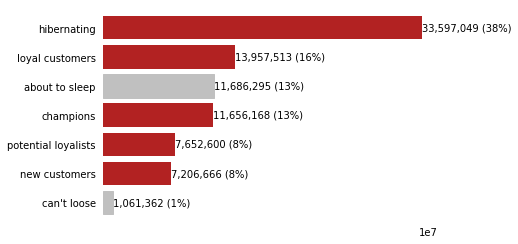

In [17]:

# count the number of customers in each segment
segments_counts = df['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='firebrick')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ["about to sleep","can't loose"]:
            bar.set_color('silver')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [18]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = df.groupby('Segment').agg({
    'DAYS': 'mean',
    'TRIPS': 'mean',
    'SALES': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                      DAYS TRIPS   SALES          
                      mean  mean    mean     count
Segment                                           
about to sleep       373.7   1.7   114.0  11686295
can't loose          627.8  10.1   666.6   1061362
champions             85.4  17.0  1152.1  11656168
hibernating          776.8   1.7   114.0  33597049
loyal customers      249.3   9.2   623.0  13957513
new customers        144.5   1.0    71.4   7206666
potential loyalists  142.4   2.4   169.3   7652600


In [20]:
CID_RFM_score = df[['CID','RFM Score','Segment']]
CID_RFM_score.to_csv('CID_RFM_score.csv')

In [1]:
# rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
# rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
# Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['count'], 
              label=[ 'hibernating',
                     'at risk',
                     'can\'t loose',
                     'about to sleep',
                     'need attention',
                     'loyal customers',
                     'promising',
                     'new customers',
                     'potential loyalists',
                     'champions'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()